In [25]:

waypoints = [ {
            'position': (0.7233399911623,-0.6730319357494),
            'color': '#80C4E9',  # Blu
            'color_blinked': '#80C4E9',
            'label': 'CALM'
        },
        {
            'position': (-0.31667, 0.26667),
            'color':  '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'SUSPICIOUS'
        },
        {
            'position': (-0.035, -1/3),
            'color': '#FFD63A', #Yellow
            'color_blinked': '#FFD63A',
            'label': 'WORRIED'
        },
        {
            'position': (-0.075, 0.89833),
            'color': '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'ALARMED'
        },
        {
            'position': (-0.4, 0.78333),
            'color': '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'AFRAID'
        },
       {
            'position': (-0.705, 0.55833),
            'color': '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'DISTRESSED'
        },
        {
            'position': (-0.695, 0.59833),
            'color': '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'AFRAID'
        },
        {
            'position': (-0.075, 0.87833),
            'color': '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'ALARMED'
        },
        {
            'position': (-0.78333, 0.266667),
            'color': '#FF2929', #Red
            'color_blinked': '#FF2929',
            'label': 'BITTER'
        },
    {
            'position': (-0.035, -0.36),
            'color': '#FFD63A', #Yellow
            'color_blinked': '#FFD63A',
            'label': 'WORRIED'
        }
    ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


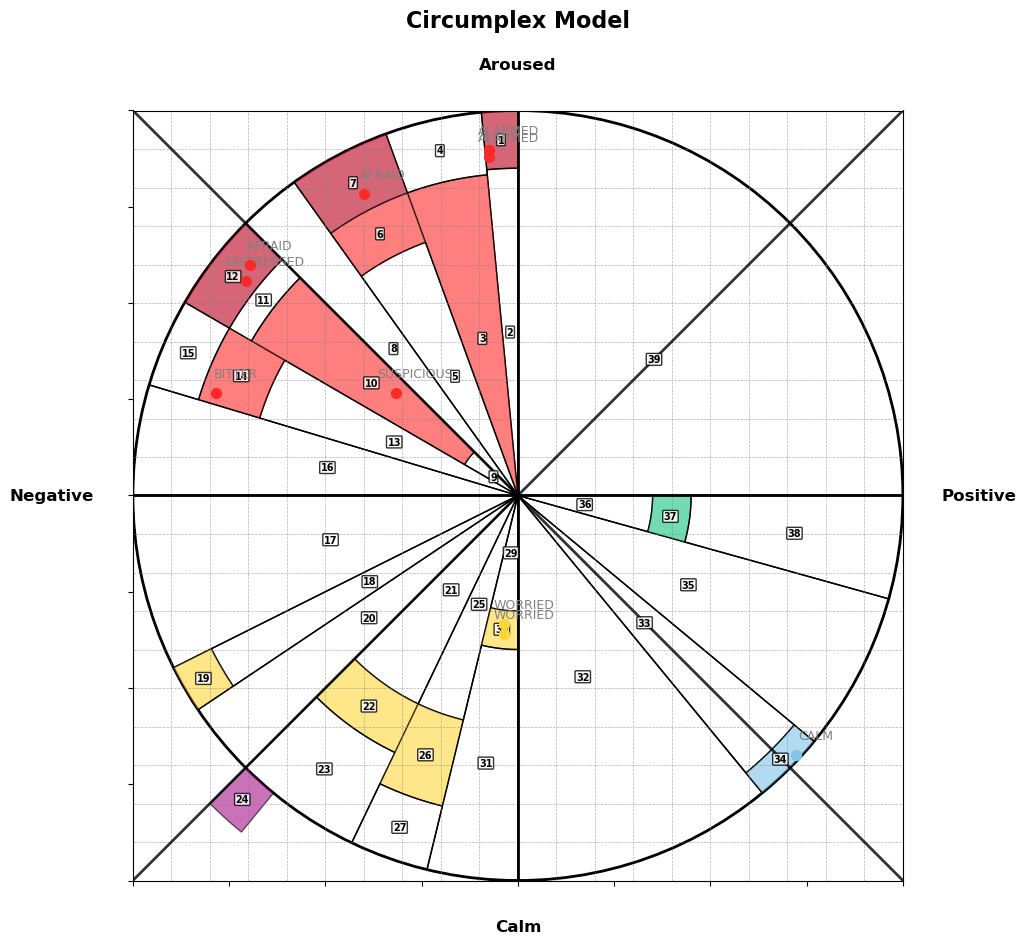

In [26]:
from Dynamic_RusselPlot import CircumplexPlotter
from RusselSpacePartition import POLAR_REGIONS
%load_ext autoreload
%autoreload 2

cp = CircumplexPlotter()
for region in POLAR_REGIONS.keys():
                cp.add_region(POLAR_REGIONS[region]['radius']['min'], POLAR_REGIONS[region]['radius']['max'],
                                POLAR_REGIONS[region]['angle']['min'], POLAR_REGIONS[region]['angle']['max'],
                                color=POLAR_REGIONS[region]['color'], alpha=0.6, label=region
                                , include_label=True)
for p in waypoints:
    cp.add_point(r=p['position'][0], theta= p['position'][1], label=p['label'], point_color=p['color'], is_polar=False)

In [ ]:
%load_ext autoreload
%autoreload 2
from Dynamic_RusselPlot import RusselPlotAnimator, TrailMode


animator = RusselPlotAnimator(width=1280, height=720, fps=30)

animator.add_waypoints(waypoints)

print("\nCreando video con frame individuali...")
video_path = animator.create_frame_based_video(
    trail_mode=TrailMode.GROWING,
    duration_per_segment=2.0,
    trail_length=60,
    output_path="russel_plot_frames.mp4"
)

print(f"\nVideo completato: {video_path}")

In [28]:
import cv2

# Create video with proper codec and error handling
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try 'mp4v' first
video_writer = cv2.VideoWriter('.', fourcc, 30, (1280, 720))

# Check if VideoWriter was initialized properly
if not video_writer.isOpened():
    print(f"Failed to open video writer with mp4v codec. Trying alternative codecs...")
    video_writer.release()
    
    # Try alternative codecs
    for codec in ['XVID', 'X264', 'avc1']:
        fourcc = cv2.VideoWriter_fourcc(*codec)
        video_writer = cv2.VideoWriter(output_path, fourcc, self.fps, (self.width, self.height))
        if video_writer.isOpened():
            print(f"Successfully opened video writer with {codec} codec")
            break
        video_writer.release()
    
    # If all codecs fail, try changing the file extension
    if not video_writer.isOpened():
        output_path_avi = output_path.replace('.mp4', '.avi')
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        video_writer = cv2.VideoWriter(output_path_avi, fourcc, self.fps, (self.width, self.height))
        if video_writer.isOpened():
            print(f"Fallback: saving as AVI format to {output_path_avi}")
            output_path = output_path_avi

if not video_writer.isOpened():
    raise RuntimeError("Failed to initialize video writer with any codec")

# Write frames with proper error handling
frames_written = 0
for frame_idx in range(len(x_coords)):
    frame_path = os.path.join(temp_dir, f"frame_{frame_idx:06d}.png")
    
    if not os.path.exists(frame_path):
        print(f"Warning: Frame {frame_path} does not exist, skipping...")
        continue
        
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Warning: Could not read frame {frame_path}, skipping...")
        continue
    
    # Ensure frame has the correct dimensions
    if frame.shape[:2] != (self.height, self.width):
        print(f"Warning: Frame {frame_idx} has dimensions {frame.shape[:2]}, expected ({self.height}, {self.width})")
        frame = cv2.resize(frame, (self.width, self.height))
    
    # Write frame
    success = video_writer.write(frame)
    if success:
        frames_written += 1
    else:
        print(f"Warning: Failed to write frame {frame_idx}")

print(f"Successfully wrote {frames_written} frames to video")
video_writer.release()

# Verify the output file
if os.path.exists(output_path):
    file_size = os.path.getsize(output_path)
    print(f"Output video file size: {file_size} bytes")
    if file_size < 1000:  # Less than 1KB is likely corrupted
        print("Warning: Output file is very small, possibly corrupted")
else:
    print("Error: Output file was not created")

2